## Student Performance Indicator
- Understanding the problem statement
- Data Collection'
- Data Checks
- Exploratory Data Analysis
- Data Pre-processing
- Model Training
- Choose the best model

### 1) Problem Statement
- This project understands how the student's performace (test score) is affected by other variables such gender, ethinicity, parental education, test preparation course.

### 2) Data Collection
- Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consist of 8 columns and 1000 rows.

#### 2.1 Import Data and Required Packages

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import CSV data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

Show top and bottom records

In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


#### 2.2 Data Information


- gender: sex of students
- race_ethinicity: ethinicity of students
- parental_level_of_education: parents' highest education
- lunch: having lunch before test
- test preparation course: completed of not before test
- math score,  reading score, writing score

shape of the dataset

In [5]:
df.shape

(1000, 8)

### 3) Data Checks
- check missing values
- check duplicates
- Check Datatypes
- Check the number of unique values of each column
- Check Statistics of dataset
- check various categories present in the different categorical columns

#### 3.1 Missing values

In [6]:
df.isnull().mean()

gender                         0.0
race_ethnicity                 0.0
parental_level_of_education    0.0
lunch                          0.0
test_preparation_course        0.0
math_score                     0.0
reading_score                  0.0
writing_score                  0.0
dtype: float64

### observation 
- no missing values

#### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

### observation
- no duplicates

#### 3.3 Check Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### observation
- 5 categorical columns
- 3 numerical columns

### 3.4 Number of Unique Values

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### observation
- gender, lunch and test_preparation_course are binary columns i.e. 2 unique values.
- race_ethinicity has 5 unique and parental_level_education has 6 unique values

### 3.5 Check Statistics of dataset

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


### observation
- math_score has a minimum score of zero.
- distribution of three columns are similar in nature.

In [11]:
## define categorical and numerical columns

categorical_cols = [col for col in df.columns if df[col].dtype=='O']
numerical_cols = [col for col in df.columns if col not in categorical_cols]

print(f"categorical_cols: {categorical_cols}")
print(f"length of categorical columns: {len(categorical_cols)}\n")

print(f"numerical_cols: {numerical_cols}")
print(f"length of numerical columns: {len(numerical_cols)}")


categorical_cols: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
length of categorical columns: 5

numerical_cols: ['math_score', 'reading_score', 'writing_score']
length of numerical columns: 3


#### 3.6 Categories of Categorical Columns


In [12]:
for col in categorical_cols:
    print("Categories of {} {}: \n".format(col,df[col].unique()))    

Categories of gender ['female' 'male']: 

Categories of race_ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']: 

Categories of parental_level_of_education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']: 

Categories of lunch ['standard' 'free/reduced']: 

Categories of test_preparation_course ['none' 'completed']: 



### 4) Exploratory Data Analysis

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
reading_full = df[df['reading_score'] == 100].shape[0]
writing_full = df[df['writing_score'] == 100].shape[0]
math_full = df[df['math_score'] == 100].shape[0]


print(f"Number of students with full marks in Maths: {math_full}")
print(f"Number of students with full marks in Writing: {writing_full}")
print(f"Number of students with full marks in Reading: {reading_full}")

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [15]:
reading_less_30 = df[df['reading_score'] <= 30].shape[0]
writing_less_30 = df[df['writing_score'] <= 30].shape[0]
math_less_30 = df[df['math_score'] <= 30].shape[0]


print(f"Number of students with marks less than 30 in Maths: {math_less_30}")
print(f"Number of students with marks less than 30 in Writing: {writing_less_30}")
print(f"Number of students with marks less than 30 in Reading: {reading_less_30}")

Number of students with marks less than 30 in Maths: 16
Number of students with marks less than 30 in Writing: 10
Number of students with marks less than 30 in Reading: 8


### observation
- student have performed well in reading.
- students have performed worst in maths.


#### 4.1 EDA (Visualisation)

- Visualize score distribution to make conclusions

- Histogram
- Kernal Distribution Function (KDE)

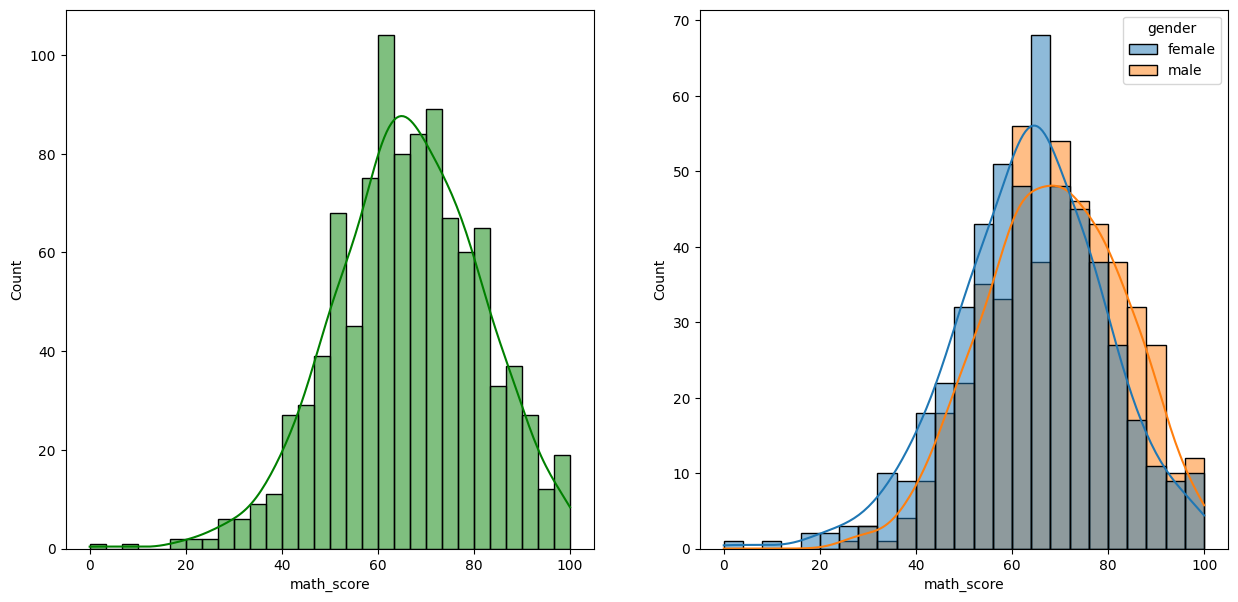

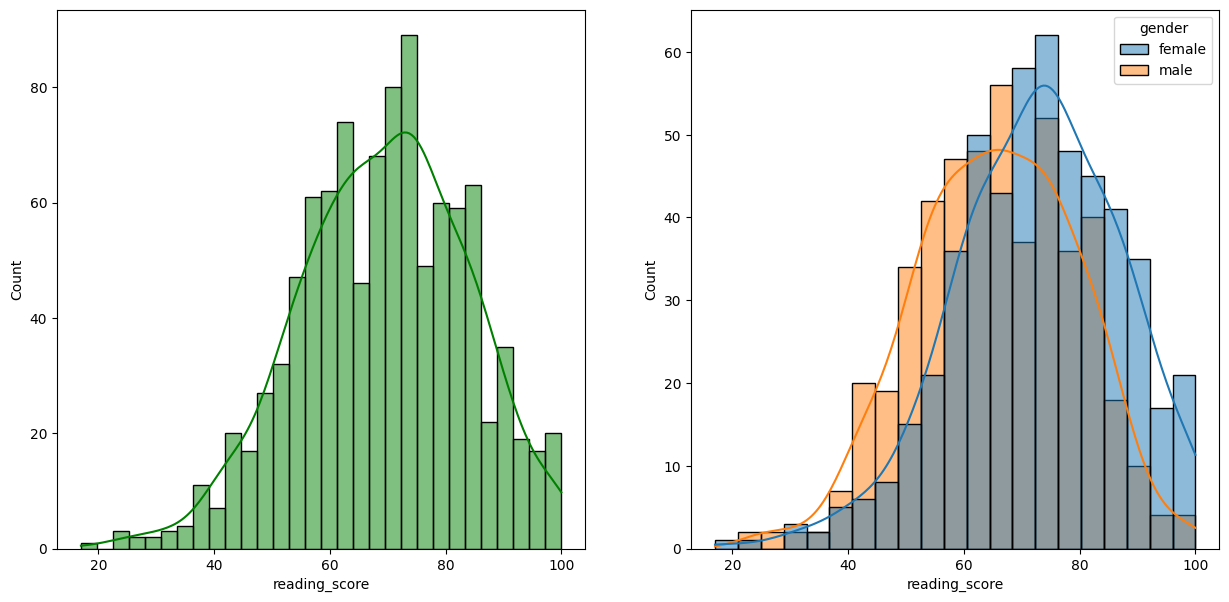

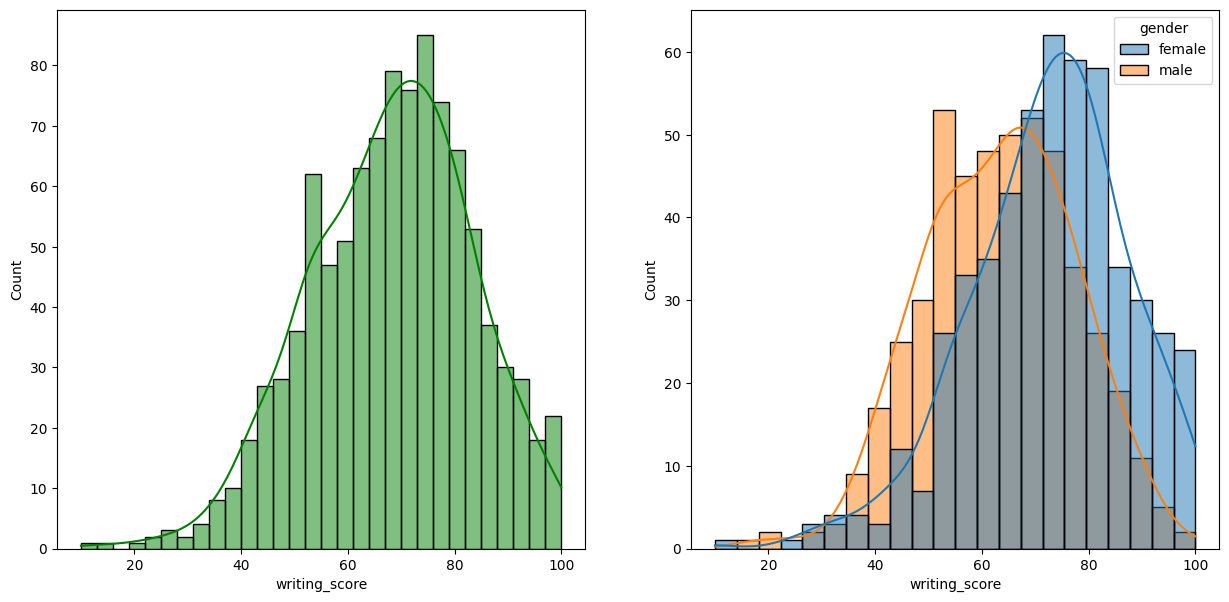

In [27]:
for col in numerical_cols:
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    plt.subplot(121)
    sns.histplot(data=df, x=col,bins=30,kde=True,color='g')
    plt.subplot(122)
    sns.histplot(data=df,x=col,kde=True,hue='gender')
    plt.show()

### observation
- female students tend to perform better than male students across all subjects

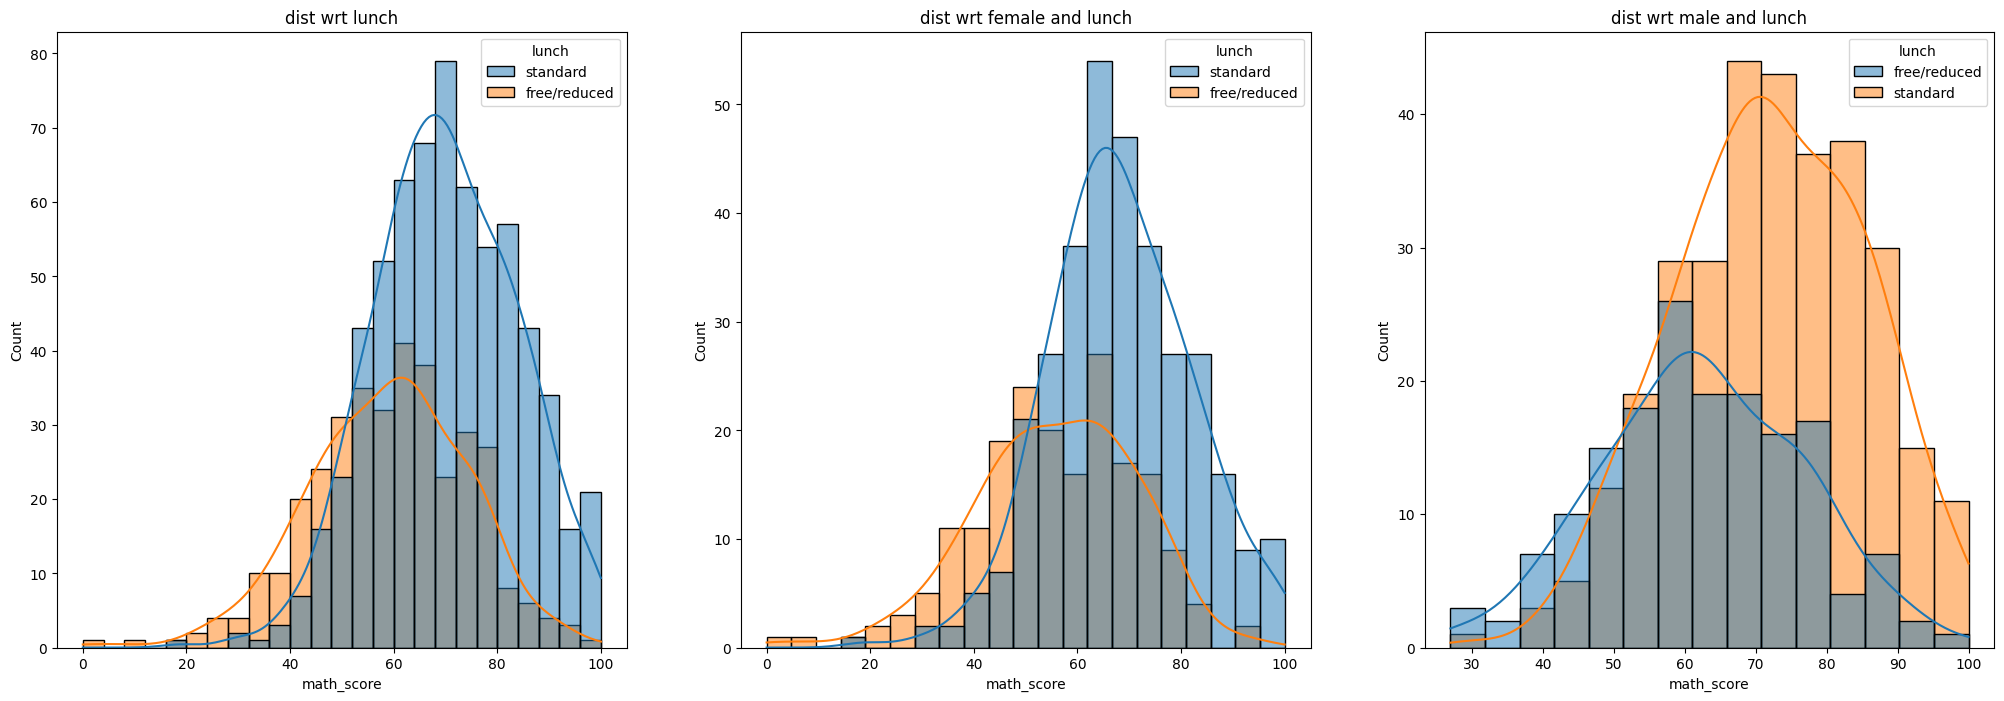

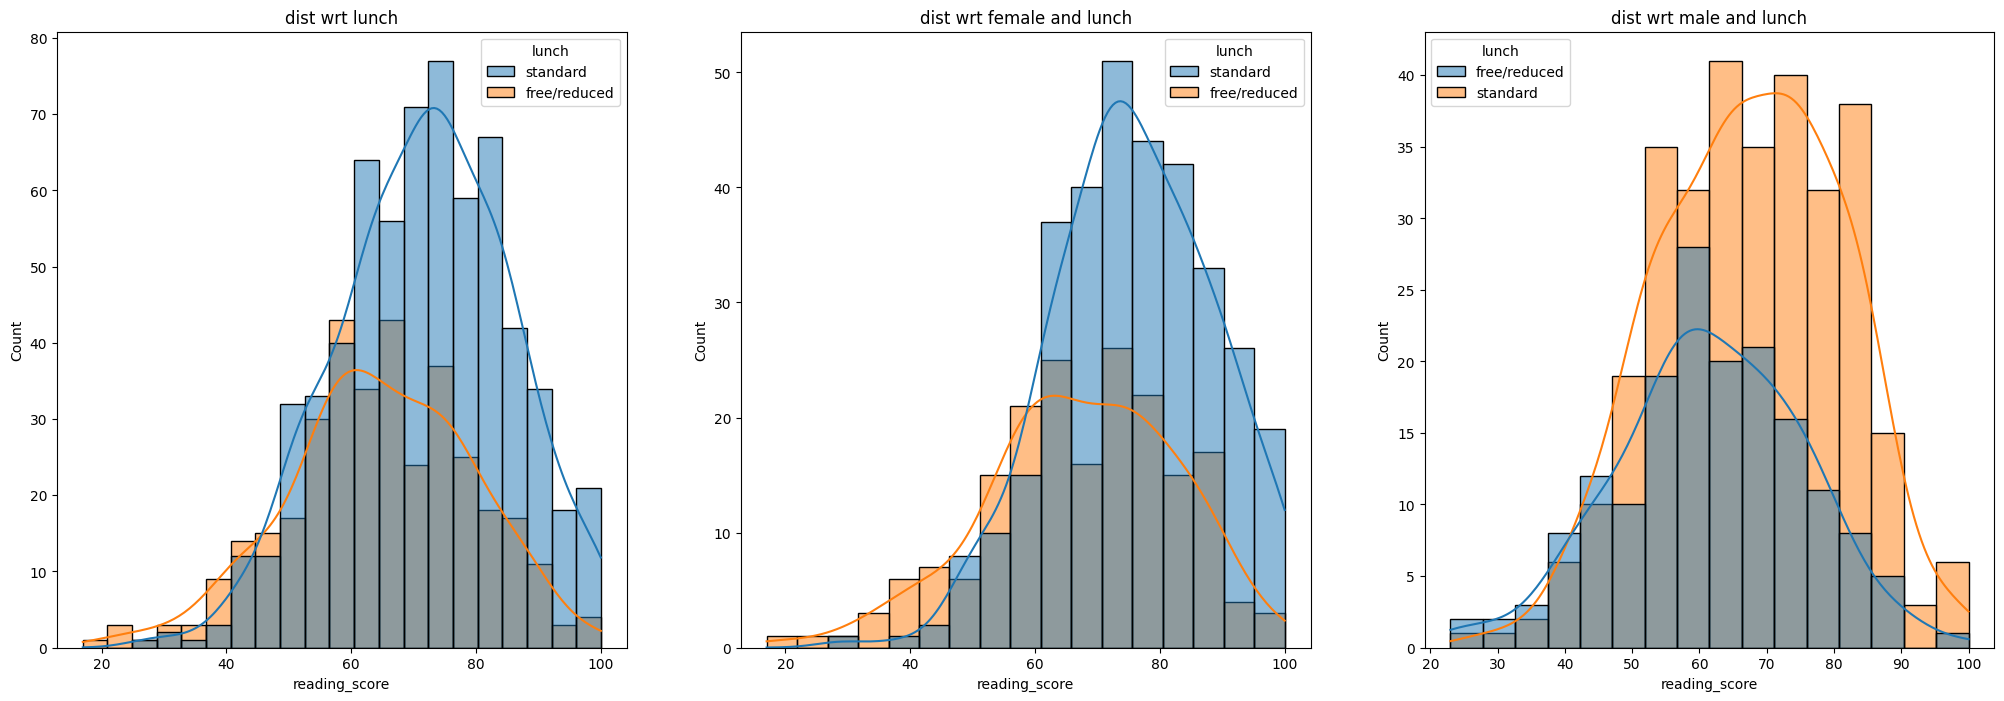

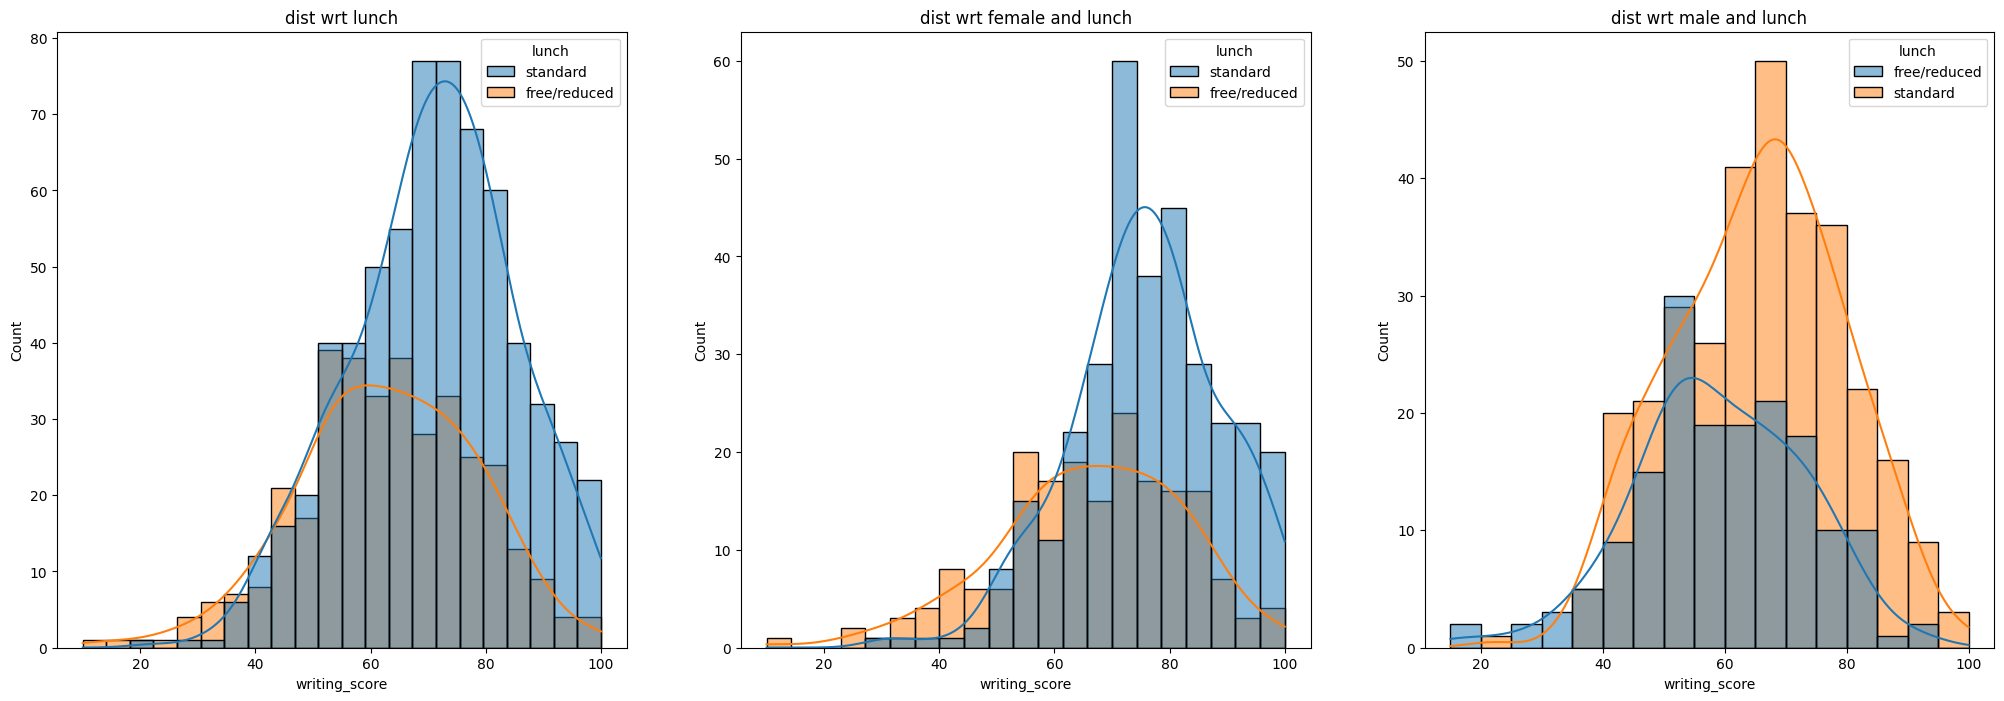

In [42]:
for col in numerical_cols:
    plt.subplots(1, 3, figsize=(25,8))
    plt.subplot(131)
    sns.histplot(data=df, x=col,hue='lunch',kde=True)
    plt.title("dist wrt lunch")
    plt.subplot(132)
    plt.title("dist wrt female and lunch")
    sns.histplot(data=df[df.gender=='female'],x=col,kde=True,hue='lunch')
    plt.subplot(133)
    plt.title("dist wrt male and lunch")
    sns.histplot(data=df[df.gender=='male'],x=col,kde=True,hue='lunch')
    plt.show()

### observation
- standard lunch helps performs well 
- standard lunch helps performs helps be it male or female across all three subjects

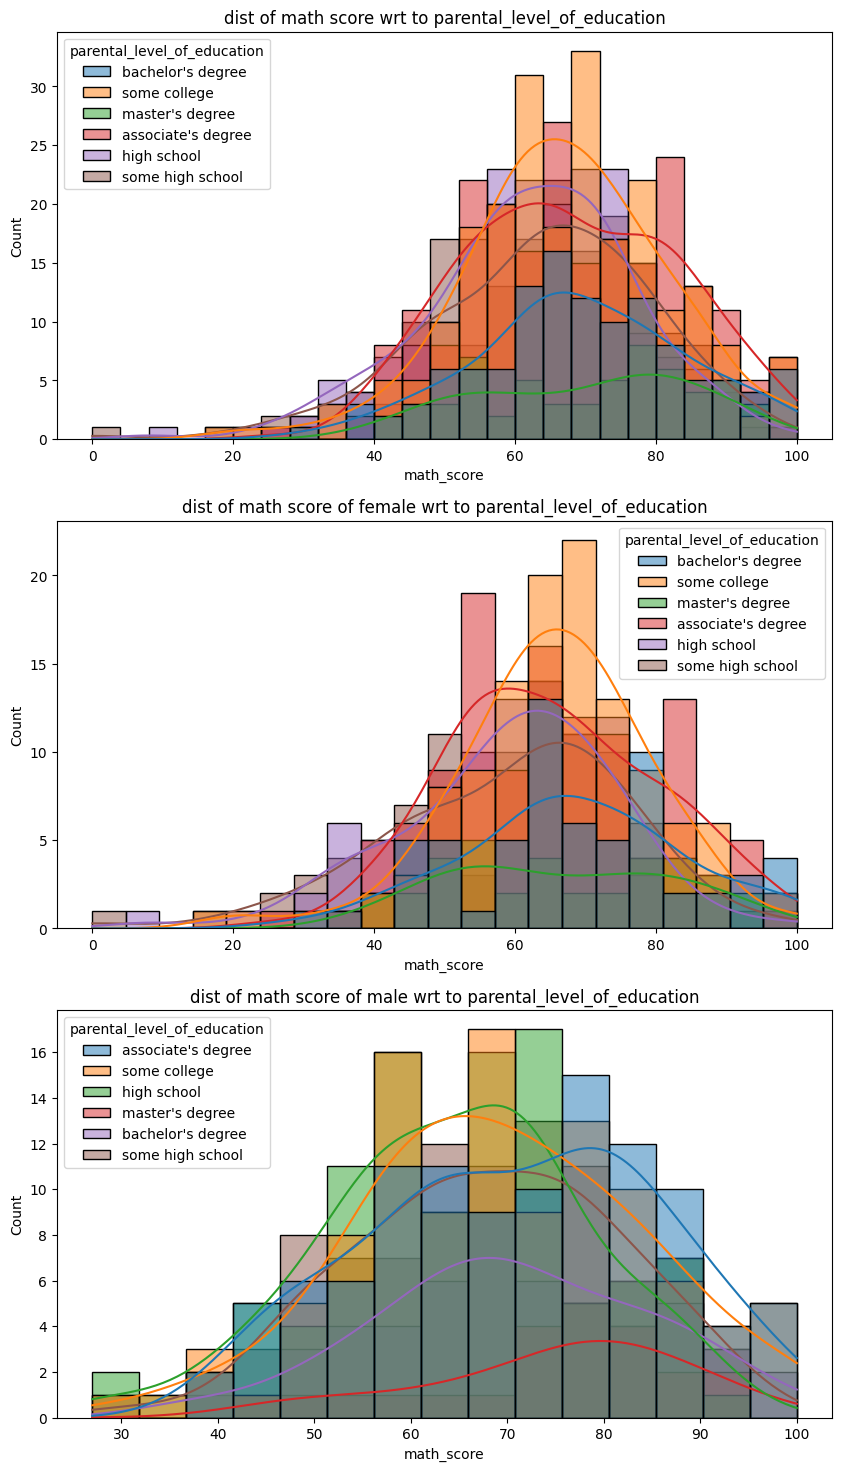

In [62]:
plt.subplots(1,3, figsize=(10,18))
plt.subplot(311)
ax1 = sns.histplot(data=df, x='math_score',kde=True,hue='parental_level_of_education')
plt.title("dist of math score wrt to parental_level_of_education")
plt.subplot(312)
plt.title("dist of math score of female wrt to parental_level_of_education")
ax = sns.histplot(data=df[df.gender=='female'], x='math_score',kde=True,hue='parental_level_of_education')
plt.subplot(313)
plt.title("dist of math score of male wrt to parental_level_of_education")
ax = sns.histplot(data=df.query('gender=="male"'),x='math_score',kde=True,hue='parental_level_of_education')
plt.show()

### Observation
- in general students of parents with `some college` level and `high school` education have performed well in maths.
- for female students, parents with `some college` and  `associate degree` have performed well.
- for male students, parents with `high school` and `some school` have almost similar performance.

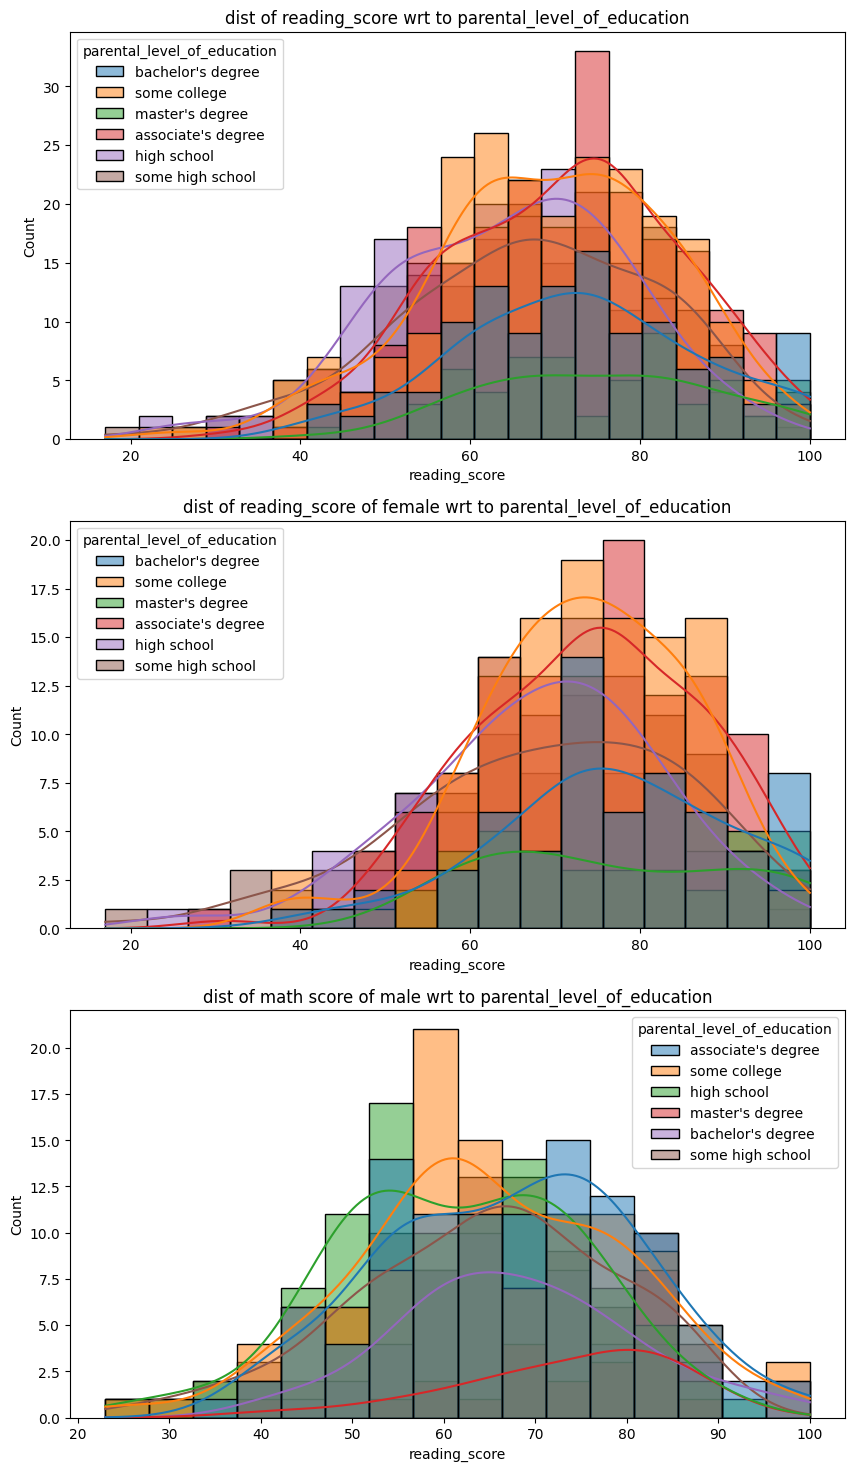

In [63]:
## parental education vs reading score
plt.subplots(1,3, figsize=(10,18))
plt.subplot(311)
ax1 = sns.histplot(data=df, x='reading_score',kde=True,hue='parental_level_of_education')
plt.title("dist of reading_score wrt to parental_level_of_education")
plt.subplot(312)
plt.title("dist of reading_score of female wrt to parental_level_of_education")
ax = sns.histplot(data=df[df.gender=='female'], x='reading_score',kde=True,hue='parental_level_of_education')
plt.subplot(313)
plt.title("dist of math score of male wrt to parental_level_of_education")
ax = sns.histplot(data=df.query('gender=="male"'),x='reading_score',kde=True,hue='parental_level_of_education')
plt.show()

### observation 
- in general, parents of students with `associate degree` and `some college` have similar dist and have performed best.
- for female students, parents with `some school` and `associate degree` have performed best similar to above with little difference.
- for male students, parents with `associate degree` and `some college` have performed best.

In [ ]:
## commets